In [1]:
! git clone https://github.com/data-psl/lectures2022
import sys
sys.path.append('lectures2022/notebooks/02_sklearn')
%cd 'lectures2022/notebooks/02_sklearn'

fatal: destination path 'lectures2022' already exists and is not an empty directory.
/Users/h.richard/Teaching/psl-intensive-week/lectures2023/notebooks/02_sklearn/lectures2022/notebooks/02_sklearn


In this notebook we define a Pipeline estimator that first apply a `PCA` and then classify the reduced representation using a `LogisticRegression`.

We will use the `Pipeline` object and the `GridSearchCV` object, as well as a little `pandas` in the end

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

Now that you have all useful objects in hand, define a pipeline that first apply a PCA transform and then apply a LogisticRegression.
You may look at `Pipeline` documentation of scikit-learn

In [3]:
# %load "solutions/06-Pipeline-1.py"
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

The elements of the Pipeline are named and accessed using `estimator.get_params()`, and may be modified using `estimator.set_params()`

In [4]:
pipe.get_params()

{'memory': None,
 'steps': [('pca', PCA()),
  ('logistic', LogisticRegression(max_iter=10000, tol=0.1))],
 'verbose': False,
 'pca': PCA(),
 'logistic': LogisticRegression(max_iter=10000, tol=0.1),
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 10000,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.1,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [5]:
pipe.set_params(pca__n_components=10)

Pipeline(steps=[('pca', PCA(n_components=10)),
                ('logistic', LogisticRegression(max_iter=10000, tol=0.1))])

## Performing a grid-search on multiple parameters

We want to test what reduction we should use in the `PCA`, along with what regularization in the `LogisticRegression`

How do we do that ? We use a `GridSearchCV` with multiple parameters

In [6]:
X_digits, y_digits = datasets.load_digits(return_X_y=True)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)

In [7]:
search

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA(n_components=10)),
                                       ('logistic',
                                        LogisticRegression(max_iter=10000,
                                                           tol=0.1))]),
             n_jobs=-1,
             param_grid={'logistic__C': array([1.00000000e-04, 4.64158883e-02, 2.15443469e+01, 1.00000000e+04]),
                         'pca__n_components': [5, 15, 30, 45, 64]})

In [8]:
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

pca.fit(X_digits)

Best parameter (CV score=0.920):
{'logistic__C': 0.046415888336127774, 'pca__n_components': 45}


PCA(n_components=10)

Let's see how how the explained signal vary with the PCA size


Text(0.5, 0, 'n_components')

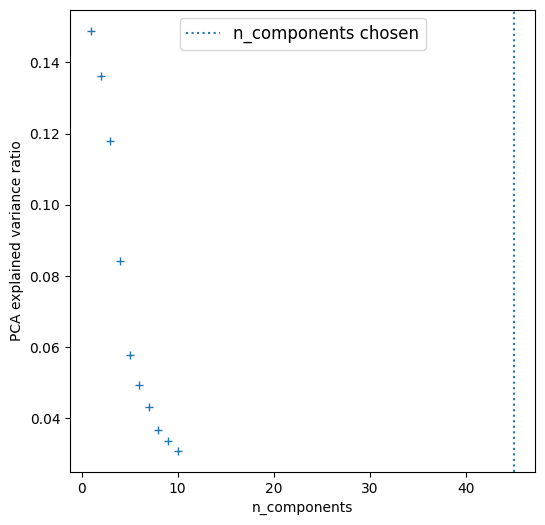

In [9]:
fig, ax0 = plt.subplots(nrows=1, figsize=(6, 6))


ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=4)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12), loc='upper center')

ax0.set_xlabel('n_components')


### Exploring grid-search

To explore the grid search results, we may transform the attribute `cv_results_` in a DataFrame.

**Question**: how many results should appear ?
4 x 5 = 20 results

In [10]:
search.cv_results_

{'mean_fit_time': array([0.04525361, 0.04857874, 0.0563076 , 0.09252472, 0.08310018,
        0.31112776, 0.2024158 , 0.1549448 , 0.1755332 , 0.18101983,
        0.55725002, 0.79860563, 0.07713923, 0.07718225, 0.06392155,
        0.5571116 , 0.94066672, 0.04609857, 0.06281786, 0.05470018]),
 'std_fit_time': array([0.00562106, 0.00814653, 0.00486404, 0.01057152, 0.01050269,
        0.0357695 , 0.02407381, 0.02869773, 0.02739769, 0.01978173,
        0.14803504, 0.1656631 , 0.00765312, 0.00711371, 0.00601134,
        0.2390007 , 0.19395437, 0.00281468, 0.00532898, 0.00368695]),
 'mean_score_time': array([0.00228949, 0.00140848, 0.00136681, 0.00154691, 0.00163298,
        0.00161247, 0.00129342, 0.00138917, 0.00157418, 0.00147595,
        0.00118322, 0.00139523, 0.00133662, 0.00140367, 0.00142245,
        0.00124097, 0.00102525, 0.0014071 , 0.00146432, 0.00137897]),
 'std_score_time': array([9.62017027e-04, 4.42108298e-04, 1.19733839e-04, 1.08522459e-04,
        4.65662514e-04, 6.95452559e-

In [11]:
results = pd.DataFrame(search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.045254,0.005621,0.002289,0.000962,0.0001,5,"{'logistic__C': 0.0001, 'pca__n_components': 5}",0.780556,0.758333,0.802228,0.805014,0.746518,0.778530,0.023237,20
1,0.048579,0.008147,0.001408,0.000442,0.0001,15,"{'logistic__C': 0.0001, 'pca__n_components': 15}",0.897222,0.858333,0.896936,0.938719,0.849582,0.888158,0.031916,14
2,0.056308,0.004864,0.001367,0.000120,0.0001,30,"{'logistic__C': 0.0001, 'pca__n_components': 30}",0.905556,0.880556,0.910864,0.944290,0.857939,0.899841,0.029181,9
3,0.092525,0.010572,0.001547,0.000109,0.0001,45,"{'logistic__C': 0.0001, 'pca__n_components': 45}",0.905556,0.877778,0.908078,0.944290,0.863510,0.899842,0.027867,8
4,0.083100,0.010503,0.001633,0.000466,0.0001,64,"{'logistic__C': 0.0001, 'pca__n_components': 64}",0.905556,0.880556,0.908078,0.944290,0.863510,0.900398,0.027446,7
5,0.311128,0.035770,0.001612,0.000695,0.046416,5,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.838889,0.750000,0.844011,0.869081,0.818942,0.824184,0.040388,17
6,0.202416,0.024074,0.001293,0.000101,0.046416,15,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.933333,0.852778,0.924791,0.924791,0.891365,0.905412,0.029995,6
7,0.154945,0.028698,0.001389,0.000166,0.046416,30,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.922222,0.875000,0.933148,0.961003,0.899721,0.918219,0.029255,3
8,0.175533,0.027398,0.001574,0.000150,0.046416,45,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.925000,0.875000,0.941504,0.955432,0.902507,0.919889,0.028544,1
9,0.181020,0.019782,0.001476,0.000126,0.046416,64,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.925000,0.875000,0.938719,0.955432,0.905292,0.919889,0.027828,1


Let's index these results by the hyper-parameters

In [12]:
results = results.set_index(['param_pca__n_components','param_logistic__C']).sort_index()
results

mean_fit_time  std_fit_time   
param_pca__n_components param_logistic__C                                   
5                       0.0001                     0.045254      0.005621  \
                        0.046415888336127774       0.311128      0.035770   
                        21.54434690031882          0.557250      0.148035   
                        10000.0                    0.557112      0.239001   
15                      0.0001                     0.048579      0.008147   
                        0.046415888336127774       0.202416      0.024074   
                        21.54434690031882          0.798606      0.165663   
                        10000.0                    0.940667      0.193954   
30                      0.0001                     0.056308      0.004864   
                        0.046415888336127774       0.154945      0.028698   
                        21.54434690031882          0.077139      0.007653   
                        10000.0                    0.046099      0.002815   
45                      0.0001                     0.092525      0.010572   
                        0.046415888336127774       0.175533      0.027398   
                        21.54434690031882          0.077182      0.007114   
                        10000.0                    0.062818      0.005329   
64                      0.0001                     0.083100      0.010503   
                        0.046415888336127774       0.181020      0.019782   
                        21.54434690031882          0.063922      0.006011   
                        10000.0                    0.054700      0.003687   

                                              mean_score_time  std_score_time   
param_pca__n_components param_logistic__C                                       
5                       0.0001                       0.002289        0.000962  \
                        0.046415888336127774         0.001612        0.000695   
                        21.54434690031882            0.001183        0.000090   
                        10000.0                      0.001241        0.000081   
15                      0.0001                       0.001408        0.000442   
                        0.046415888336127774         0.001293        0.000101   
                        21.54434690031882            0.001395        0.000189   
                        10000.0                      0.001025        0.000229   
30                      0.0001                       0.001367        0.000120   
                        0.046415888336127774         0.001389        0.000166   
                        21.54434690031882            0.001337        0.000089   
                        10000.0                      0.001407        0.000082   
45                      0.0001                       0.001547        0.000109   
                        0.046415888336127774         0.001574        0.000150   
                        21.54434690031882            0.001404        0.000138   
                        10000.0                      0.001464        0.000157   
64                      0.0001                       0.001633        0.000466   
                        0.046415888336127774         0.001476        0.000126   
                        21.54434690031882            0.001422        0.000106   
                        10000.0                      0.001379        0.000078   

                                                                                         params   
param_pca__n_components param_logistic__C                                                         
5                       0.0001                  {'logistic__C': 0.0001, 'pca__n_components': 5}  \
                        0.046415888336127774  {'logistic__C': 0.046415888336127774, 'pca__n_...   
                        21.54434690031882     {'logistic__C': 21.54434690031882, 'pca__n_com...   
                        10000.0                {'logistic__C': 10000.0, '

In [13]:
# Take the best C for each `n_components`
best_clfs = results.reset_index().groupby('param_pca__n_components').apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

In [14]:
best_clfs

,,param_pca__n_components,param_logistic__C,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
param_pca__n_components,,,,,,,,,,,,,,,,
5,1,5,0.046416,0.311128,0.035770,0.001612,0.000695,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.838889,0.750000,0.844011,0.869081,0.818942,0.824184,0.040388,17
15,5,15,0.046416,0.202416,0.024074,0.001293,0.000101,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.933333,0.852778,0.924791,0.924791,0.891365,0.905412,0.029995,6
30,9,30,0.046416,0.154945,0.028698,0.001389,0.000166,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.922222,0.875000,0.933148,0.961003,0.899721,0.918219,0.029255,3
45,13,45,0.046416,0.175533,0.027398,0.001574,0.000150,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.925000,0.875000,0.941504,0.955432,0.902507,0.919889,0.028544,1
64,17,64,0.046416,0.181020,0.019782,0.001476,0.000126,"{'logistic__C': 0.046415888336127774, 'pca__n_...",0.925000,0.875000,0.938719,0.955432,0.905292,0.919889,0.027828,1


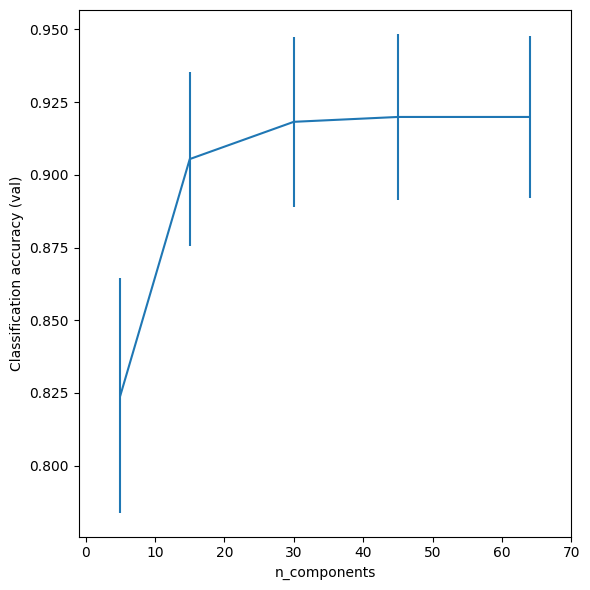

In [15]:
fig, ax1 = plt.subplots(nrows=1, figsize=(6, 6))

best_clfs.plot(x='param_pca__n_components', y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()